<a href="https://colab.research.google.com/github/thatpeacegirl/Economic-Variable-Analysis/blob/main/Economic_Variable_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Merging Relevant Data

In [ ]:
import pandas as pd

In [ ]:
inflation_df = pd.read_csv("/content/Nigeria_Inflation_Rate_Data.csv")
m1_money_df = pd.read_csv("/content/Nigeria_M1_Data.csv")
stock_exchange_df = pd.read_csv("/content/Nigeria_Stock_Exchange_Data.csv")
exchange_rate_df = pd.read_csv("/content/Nigeria_USD_Exchange_Rate.csv")

In [ ]:
inflation_df.columns
m1_money_df.columns
stock_exchange_df.columns
exchange_rate_df.columns

Index(['Date', 'Naira to USD Exchange Rate', 'Change %',
       'Exchange Rate Growth'],
      dtype='object')

In [ ]:
inflation_df.drop(columns=['Year', 'Month', 'Inflation Rate Percent'], inplace=True)
m1_money_df.drop(columns=['Country', 'Month', 'Year'], inplace=True)
stock_exchange_df.drop(columns=['Change %'], inplace=True)
exchange_rate_df.drop(columns=['Change %'], inplace=True)

In [ ]:
print(inflation_df.columns)
print(m1_money_df.columns)
print(stock_exchange_df.columns)
print(exchange_rate_df.columns)

Index(['Date', 'Inflation Rate Per Month', 'Inflation Rate Growth'], dtype='object')
Index(['Date', 'M1', 'M1 Growth Rate'], dtype='object')
Index(['Date', 'Stock Price', 'Stock Price Growth'], dtype='object')
Index(['Date', 'Naira to USD Exchange Rate', 'Exchange Rate Growth'], dtype='object')


In [ ]:
inflation_df.head()
m1_money_df.head()
stock_exchange_df.head()
exchange_rate_df.head()

,Date,Naira to USD Exchange Rate,Exchange Rate Growth
0,01/02/2004,136.4,-0.000044
1,01/03/2004,132,-0.000323
2,01/04/2004,133.125,0.000085
3,01/05/2004,133.4,0.000021
4,01/06/2004,132.75,-0.000049


In [ ]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      244 non-null    object 
 1   Inflation Rate Per Month  244 non-null    float64
 2   Inflation Rate Growth     244 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [ ]:
# convert date column to datetime object
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'], format='%d/%m/%Y')
m1_money_df['Date'] = pd.to_datetime(m1_money_df['Date'], format='%d/%m/%Y')
stock_exchange_df['Date'] = pd.to_datetime(stock_exchange_df['Date'], format='%d/%m/%Y')
exchange_rate_df['Date'] = pd.to_datetime(exchange_rate_df['Date'], format='%d/%m/%Y')

In [ ]:
inflation_df.info()
m1_money_df.info()
stock_exchange_df.info()
exchange_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      244 non-null    datetime64[ns]
 1   Inflation Rate Per Month  244 non-null    float64       
 2   Inflation Rate Growth     244 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            244 non-null    datetime64[ns]
 1   M1              244 non-null    float64       
 2   M1 Growth Rate  244 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):


In [ ]:
# Merge dataframes on 'Date' column
nigeria_eco_data = inflation_df.merge(m1_money_df, on='Date', how='inner')
nigeria_eco_data = nigeria_eco_data.merge(stock_exchange_df, on='Date', how='inner')
nigeria_eco_data = nigeria_eco_data.merge(exchange_rate_df, on='Date', how='inner')

In [ ]:
nigeria_eco_data.head()

,Date,Inflation Rate Per Month,Inflation Rate Growth,M1,M1 Growth Rate,Stock Price,Stock Price Growth,Naira to USD Exchange Rate,Exchange Rate Growth
0,2004-02-01,0.248,0.107143,1188048.7,0.059599,"25,169.20",0.001098,136.4,-0.000044
1,2004-03-01,0.225,-0.092742,1201540.2,0.011356,"22,800.41",-0.000941,132,-0.000323
2,2004-04-01,0.175,-0.222222,1178469.0,-0.019201,"25,792.97",0.001313,133.125,0.000085
3,2004-05-01,0.198,0.131429,1187078.6,0.007306,"27,730.84",0.000751,133.4,0.000021
4,2004-06-01,0.141,-0.287879,1214834.9,0.023382,"28,887.41",0.000417,132.75,-0.000049


In [ ]:
nigeria_eco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        244 non-null    datetime64[ns]
 1   Inflation Rate Per Month    244 non-null    float64       
 2   Inflation Rate Growth       244 non-null    float64       
 3   M1                          244 non-null    float64       
 4   M1 Growth Rate              244 non-null    float64       
 5   Stock Price                 244 non-null    object        
 6   Stock Price Growth          244 non-null    float64       
 7   Naira to USD Exchange Rate  244 non-null    object        
 8   Exchange Rate Growth        244 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 17.3+ KB


In [ ]:
nigeria_eco_data.to_csv('Nigeria_Economic_Data.csv', index=False)

In [ ]:
nigeria_eco_data.isnull().sum()

Date                          0
Inflation Rate Per Month      0
Inflation Rate Growth         0
M1                            0
M1 Growth Rate                0
Stock Price                   0
Stock Price Growth            0
Naira to USD Exchange Rate    0
Exchange Rate Growth          0
dtype: int64

## Correlation Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/Nigeria_Economic_Working_Data.csv")

In [ ]:
df.columns

Index(['Date', 'Year', 'Inflation Rate Per Month', 'Inflation Rate Growth',
       'M1 Value Per Month', 'M1 Growth Rate', 'Stock Price',
       'Stock Price Growth', 'Naira to USD Exchange Rate',
       'Exchange Rate Growth'],
      dtype='object')

In [ ]:
df.head()

,Date,Year,Inflation Rate Per Month,Inflation Rate Growth,M1 Value Per Month,M1 Growth Rate,Stock Price,Stock Price Growth,Naira to USD Exchange Rate,Exchange Rate Growth
0,01/02/2004,2004,0.25,0.107143,1188048.7,0.059599,25169.20,0.001098,136.400,-0.000044
1,01/03/2004,2004,0.23,-0.092742,1201540.2,0.011356,22800.41,-0.000941,132.000,-0.000323
2,01/04/2004,2004,0.18,-0.222222,1178469.0,-0.019201,25792.97,0.001313,133.125,0.000085
3,01/05/2004,2004,0.20,0.131429,1187078.6,0.007306,27730.84,0.000751,133.400,0.000021
4,01/06/2004,2004,0.14,-0.287879,1214834.9,0.023382,28887.41,0.000417,132.750,-0.000049


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        244 non-null    object 
 1   Year                        244 non-null    int64  
 2   Inflation Rate Per Month    244 non-null    float64
 3   Inflation Rate Growth       244 non-null    float64
 4   M1 Value Per Month          244 non-null    float64
 5   M1 Growth Rate              244 non-null    float64
 6   Stock Price                 244 non-null    float64
 7   Stock Price Growth          244 non-null    float64
 8   Naira to USD Exchange Rate  244 non-null    float64
 9   Exchange Rate Growth        244 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 19.2+ KB


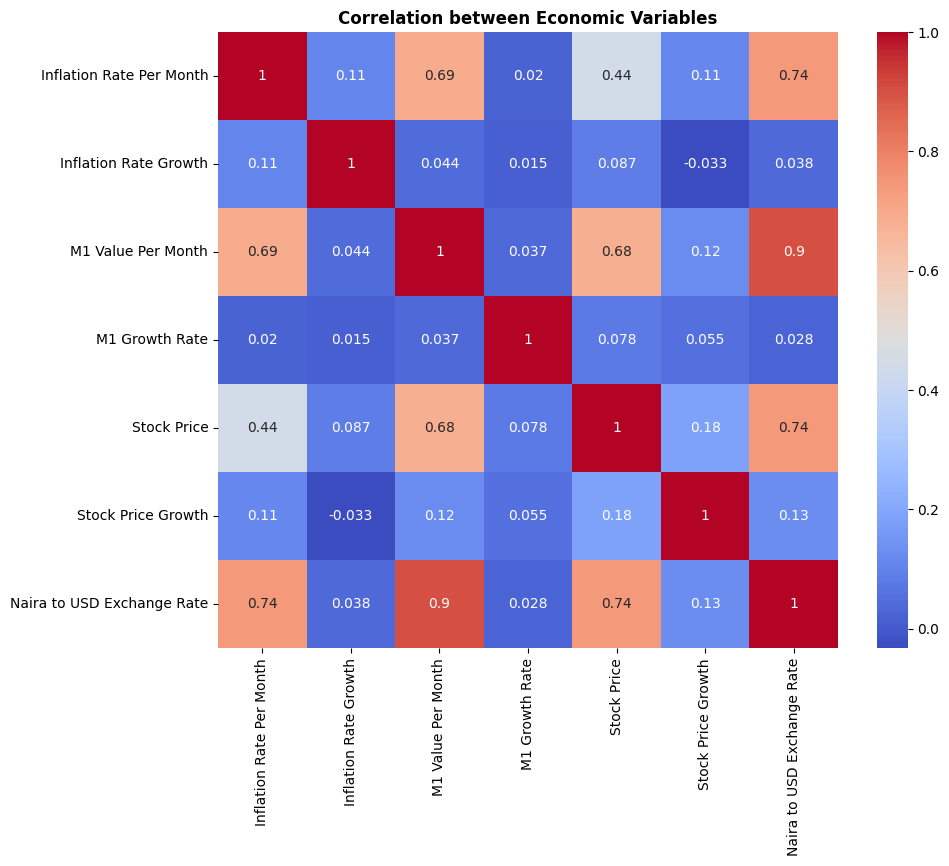

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Inflation Rate Per Month', 'Inflation Rate Growth', 'M1 Value Per Month', 'M1 Growth Rate', 'Stock Price', 'Stock Price Growth', 'Naira to USD Exchange Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Economic Variables', weight='bold')
plt.yticks(rotation=0)
plt.show()

## Productivity Model


In [ ]:
from datetime import datetime

In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
# Normalise the variables
df['Normalised_Inflation_Growth'] = (df['Inflation Rate Growth'] - df['Inflation Rate Growth'].min()) / (df['Inflation Rate Growth'].max() - df['Inflation Rate Growth'].min())
df['Normalised_Stock_Price_Growth'] = (df['Stock Price Growth'] - df['Stock Price Growth'].min()) / (df['Stock Price Growth'].max() - df['Stock Price Growth'].min())
df['Normalised_Exchange_Rate_Growth'] = (df['Exchange Rate Growth'] - df['Exchange Rate Growth'].min()) / (df['Exchange Rate Growth'].max() - df['Exchange Rate Growth'].min())

In [ ]:
df.columns

Index(['Date', 'Year', 'Inflation Rate Per Month', 'Inflation Rate Growth',
       'M1 Value Per Month', 'M1 Growth Rate', 'Stock Price',
       'Stock Price Growth', 'Naira to USD Exchange Rate',
       'Exchange Rate Growth', 'Normalised_Inflation_Growth',
       'Normalised_Stock_Price_Growth', 'Normalised_Exchange_Rate_Growth'],
      dtype='object')

In [ ]:
# Calculate Productivity Index
df['Productivity_Index'] = (df['Normalised_Inflation_Growth'] + df['Normalised_Stock_Price_Growth'] + df['Normalised_Exchange_Rate_Growth']) / 3

In [ ]:
df.isnull().sum()

Date                               0
Year                               0
Inflation Rate Per Month           0
Inflation Rate Growth              0
M1 Value Per Month                 0
M1 Growth Rate                     0
Stock Price                        0
Stock Price Growth                 0
Naira to USD Exchange Rate         0
Exchange Rate Growth               0
Normalised_Inflation_Growth        0
Normalised_Stock_Price_Growth      0
Normalised_Exchange_Rate_Growth    0
Productivity_Index                 0
dtype: int64

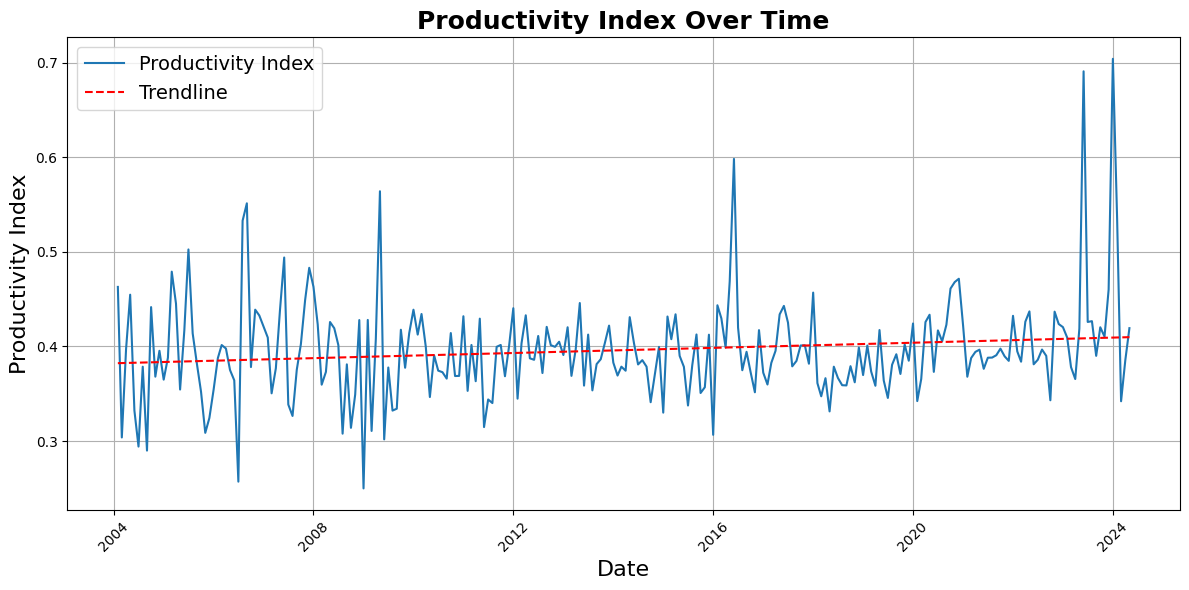

In [ ]:
# Plot Date against Productivity Index
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Productivity_Index'], label='Productivity Index')

# Add trendline (straightline with polynomial degree of 1)
# z contains coefficients of this polynomial
z = np.polyfit(df['Date'].map(datetime.toordinal), df['Productivity_Index'], 1)

# Create polynomial function from coefficients and plot trendline
p = np.poly1d(z)
plt.plot(df['Date'], p(df['Date'].map(datetime.toordinal)), "r--", label='Trendline')

# Customize x-axis labels
plt.xlabel('Date', fontsize=16)
plt.ylabel('Productivity Index', fontsize=16)
plt.title('Productivity Index Over Time', weight='bold', fontsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Print trend slope
# Slope is first value in coefficients array
print(f"Trend Slope: {z[0]:.7f}")

Trend Slope: 0.0000037


## Currency Devaluation


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
curr_df = pd.read_csv("/content/Currency_Devaluation_Data.csv")

In [ ]:
curr_df.columns

Index(['Date', 'Year', 'Nigeria Inflation Rate Per Month',
       'USA Inflation Rate Per Month', 'Naira to USD Exchange Rate'],
      dtype='object')

In [ ]:
# Adjust Exchange Rate for Inflation
curr_df['Adjusted_Exchange_Rate'] = (curr_df['Naira to USD Exchange Rate'] * (1 + curr_df['Nigeria Inflation Rate Per Month'])) / (1 + curr_df['USA Inflation Rate Per Month'])


In [ ]:
# Normalize Exchange Rate
base_year = 2004
base_rate = curr_df[curr_df['Year'] == base_year]['Adjusted_Exchange_Rate'].iloc[0]
curr_df['Normalized_Exchange_Rate'] = curr_df['Adjusted_Exchange_Rate'] / base_rate

In [ ]:
curr_df['Real_Devaluation'] = curr_df['Normalized_Exchange_Rate'].pct_change()

In [ ]:
curr_df.to_csv('Naira_USD_Currency_Devaluation.csv', index=False)